In [ ]:
20MIA1034 KONDA VIHAR
20MIA1103 K JOSEPH KUMAR
20MIA1109 V KASINATH

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re
import sys
import pandas.core.algorithms as algos
pd.pandas.set_option('display.max_columns',None)

In [5]:
train=pd.read_csv("D:\\Downloads\\train.csv")
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
train.shape

(20800, 5)

In [7]:
features=[i for i  in train.columns if i not in ['label']]

In [8]:
features

['id', 'title', 'author', 'text']

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
#Handle Missing Values
#There are Missing values where author name is not available, to make this meaningful let us fill the missing values with "unavailable" and this would be concistent for authorless titles
train.fillna('unavailable',inplace=True)


In [11]:
test=pd.read_csv("D:\\Downloads\\test.csv")

In [12]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [14]:
test.fillna('unavailable',inplace=True)

In [15]:
df=pd.concat([train,test],axis='rows')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   26000 non-null  object 
 2   author  26000 non-null  object 
 3   text    26000 non-null  object 
 4   label   20800 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [17]:
df['comb']=df['author']+"_"+df['title']#+df['text']      # Combined all the features 

In [18]:
#Clean Text Data
#This this standard cleaning, we remove all the stopwords and unncessary text other than alphabet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vihar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vihar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
wordnet=WordNetLemmatizer()
stemmer=PorterStemmer()
def clean(text):
    # text="".join([char for char in text if char not in string.punctuation])
    text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text ])
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words("english"))]
    text=" ".join(text)
    return text

In [21]:
df['comb']=df['comb'].apply(clean)

In [22]:
df.head()

,id,title,author,text,label,comb
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0,howard portnoy iranian woman jail fiction unpu...


In [26]:
#Text to Numbers using Word Embeddings - onehot
!pip install tensorflow

     ------------------------------------ 272.8/272.8 MB 453.0 kB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 531.1 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 506.8 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 480.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 57.5/57.5 kB 761.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 474.6 kB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 479.0 kB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 476.8 kB/s eta 0:00:00
     -------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [23]:
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

In [24]:
voc_size=30000   # Vocabulary size

In [25]:
title=df['comb']
title[0]

0    darrel lucu hous dem aid even see comey letter...
0    david streitfeld specter trump loosen tongu pu...
Name: comb, dtype: object

In [26]:
one_hot_r=[one_hot(words, voc_size) for words in title]

In [27]:
one_hot_r[0:2]

[[21252,
  18563,
  5479,
  5853,
  1807,
  17118,
  10597,
  24329,
  14841,
  20453,
  8212,
  14490],
 [27342, 25410, 15499, 15499, 21774, 3865, 20444, 778, 3669, 8882]]

In [28]:
sent_len=50
embedded_docs=pad_sequences(one_hot_r,padding='post',maxlen=sent_len)

In [29]:
embedded_docs[:10]

array([[21252, 18563,  5479,  5853,  1807, 17118, 10597, 24329, 14841,
        20453,  8212, 14490,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [27342, 25410, 15499, 15499, 21774,  3865, 20444,   778,  3669,
         8882,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [ 3195, 11057, 14877, 24174, 11287, 28346,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [30]:
#Model- Bidirectional LSTM
#The Bi-LSTM architecture can be visualized as follows:
#Optimizers
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

In [31]:
embedding_vector_features= 50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
# model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(100)))  # used Bidirectional LSTM
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=nadam,metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 1,621,001
Trainable params: 1,621,001
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
len(embedded_docs)

26000

In [33]:
X=embedded_docs[:train.shape[0]]
y=df['label'][:train.shape[0]]
x_test=embedded_docs[train.shape[0]:]

In [34]:
#Split data for training and testing
X_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model.fit(X_train,y_train,validation_data=(x_valid,y_valid),epochs=5,batch_size=124)

Epoch 1/5
135/135 [==============================] - 41s 265ms/step - loss: 0.3086 - accuracy: 0.8572 - val_loss: 0.0889 - val_accuracy: 0.9618
Epoch 2/5
135/135 [==============================] - 39s 291ms/step - loss: 0.0286 - accuracy: 0.9920 - val_loss: 0.0346 - val_accuracy: 0.9904
Epoch 3/5
135/135 [==============================] - 44s 329ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 4/5
135/135 [==============================] - 46s 343ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 5/5
135/135 [==============================] - 47s 351ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0316 - val_accuracy: 0.9918


In [36]:
y_pred_prob=np.array(model.predict(X_train))[:,0]
y_pred_valid=np.array(model.predict(x_valid))[:,0]
y_pred=np.array(model.predict(x_test))[:,0]

163/163 [==============================] - 4s 18ms/step


In [37]:
#Model Performance on Validation Set
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_pred_valid)

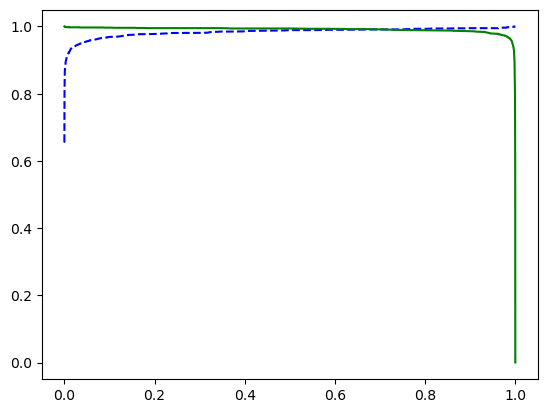

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
[...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [39]:
#Decision boundary to identify classes
A=[]
B=[]
C=[]
for i in range(len(thresholds)):
    predicted = pd.DataFrame()
    predicted["label"] = y_pred_prob
    predicted["label"] = np.where(predicted["label"] > float(thresholds[i]), 1, 0)
    pred_valid = pd.DataFrame()
    pred_valid["label"] = y_pred_valid
    pred_valid["label"] = np.where(pred_valid["label"] > float(thresholds[i]), 1, 0)
    A.append(metrics.accuracy_score(y_train, predicted))
    B.append(metrics.accuracy_score(y_valid, pred_valid))
    C.append(thresholds[i])
acc=pd.DataFrame(C,columns=['threshold'])
acc['train_acc']=A
acc['test_acc']=B
acc.sort_values(by='test_acc',ascending=False,inplace=True)

In [40]:
acc.head()

,threshold,train_acc,test_acc
1057,0.639926,1.00000,0.991827
1049,0.492075,0.99994,0.991827
1053,0.581532,1.00000,0.991827
1058,0.676105,1.00000,0.991587
1052,0.549208,1.00000,0.991587


In [41]:
cutoff=acc.iloc[0,0]
cutoff

0.6399259

In [42]:
predicted = pd.DataFrame()
predicted["label"] = y_pred_prob
predicted["label"] = np.where(predicted["label"] > float(cutoff), 1, 0)
predicted

pred_valid = pd.DataFrame()
pred_valid["label"] = y_pred_valid
pred_valid["label"] = np.where(pred_valid["label"] > float(cutoff), 1, 0)
pred_valid

predictions = pd.DataFrame()
predictions['label'] = y_pred
predictions['label'] = np.where(predictions['label'] > float(cutoff), 1, 0)
predictions

,label
0,0
1,1
2,1
3,0
4,1
...,...
5195,0
5196,0
5197,0
5198,1


In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
conf_matrix = metrics.confusion_matrix(y_train, predicted)
print(conf_matrix)
acc_train = metrics.accuracy_score(y_train, predicted)
print('Accuracy: ',acc_train)
precision_train = metrics.precision_score(y_train, predicted)
print('Presicion: ',precision_train)
sensitivity_train = metrics.recall_score(y_train, predicted)
print('Recall: ',sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print('Specificity: ',specificity_train)
roc_auc_score(y_train, predicted)

[[8255    0]
 [   0 8385]]
Accuracy:  1.0
Presicion:  1.0
Recall:  1.0
Specificity:  1.0


1.0

In [45]:
from sklearn.metrics import f1_score
print(f1_score(y_train, predicted,average='macro'))
f1_score(y_valid, pred_valid,average='macro')

1.0


0.9918220065271304